<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Simple%20Classification%20Model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [2]:
#import the data 
from sklearn.datasets import load_breast_cancer

In [3]:
#load the data 
data = load_breast_cancer()

In [4]:
#check the data type 
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [11]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Now build the model using Tensorflow 

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train the model 
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#Evaluate the model - evaluate () returns loss and accuracy

print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate (X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4235 - accuracy: 0.8451 - val_loss: 0.4199 - val_accuracy: 0.8617
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8635 - val_loss: 0.3823 - val_accuracy: 0.9043
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8740 - val_loss: 0.3514 - val_accuracy: 0.9202
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8819 - val_loss: 0.3261 - val_accuracy: 0.9255
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8924 - val_loss: 0.3048 - val_accuracy: 0.9255
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8976 - val_loss: 0.2864 - val_accuracy: 0.9255
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.9055 - val_loss: 0.2710 - val_accuracy: 0.9362
Epoch 8/100


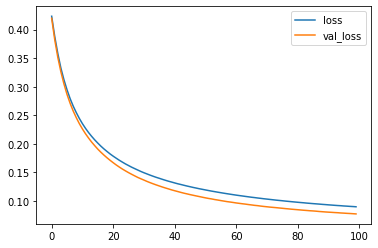

In [13]:
#Plot the output of the model.fit()

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()


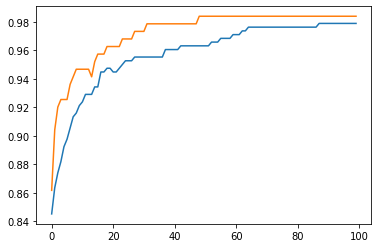

In [14]:
#Plot the accuracy too 
plt.plot(r.history ['accuracy'], label = 'acc')
plt.plot(r.history ['val_accuracy'], label ='val_acc')

In [15]:
P= model.predict (X_test)
print (P)


[[9.90034103e-01]
 [2.51895487e-02]
 [2.10046768e-04]
 [8.93226027e-01]
 [9.87926364e-01]
 [1.29312277e-04]
 [6.65912032e-03]
 [9.85887527e-01]
 [9.54565108e-01]
 [9.99193907e-01]
 [9.89159346e-01]
 [9.99331355e-01]
 [9.95127022e-01]
 [9.98374343e-01]
 [9.78062630e-01]
 [9.98263597e-01]
 [8.48221779e-03]
 [9.51856732e-01]
 [9.53450203e-01]
 [5.71256876e-02]
 [9.27296281e-03]
 [9.98125374e-01]
 [8.51667821e-02]
 [9.91780400e-01]
 [9.99168277e-01]
 [1.54465437e-04]
 [9.99969602e-01]
 [2.17846036e-03]
 [1.08919681e-04]
 [6.77024722e-02]
 [9.58195865e-01]
 [9.69023943e-01]
 [9.87975121e-01]
 [3.34934048e-05]
 [9.85863030e-01]
 [9.61621642e-01]
 [9.96914446e-01]
 [3.77893448e-04]
 [3.94243002e-03]
 [9.65350688e-01]
 [9.94338334e-01]
 [3.13329697e-03]
 [9.86645222e-01]
 [9.16672170e-01]
 [9.44562376e-01]
 [9.91398573e-01]
 [2.03050375e-02]
 [3.55459213e-01]
 [1.28878355e-02]
 [9.95489597e-01]
 [4.15086150e-02]
 [9.97057259e-01]
 [9.92545128e-01]
 [9.44789354e-05]
 [9.52457547e-01]
 [3.885030

In [19]:
import numpy as np
P=np.round(P).flatten()
print (P)

[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


In [24]:
#Calculate the accuracy and compare it to the evaluated output
#We do this by calculating the mean of the output (y) since Y is made up of a lot of results. 
#To evaluate the output, all we need do is to compare between the input and the output, in this case the evaluate function on Pythin os used/
print ("manually minimised accuracy:", np.mean(P==y_test))
print("Evaluated output:" , model.evaluate(X_test, y_test))

manually minimised accuracy: 0.9840425531914894
6/6 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9840
Evaluated output: [0.07721485197544098, 0.9840425252914429]


In [27]:
model.save('linearclassifier.h5')

In [29]:
#Check that the model has been saved into the directory 
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Nov 10 18:25 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Nov  6 17:30 sample_data


In [31]:
#Now to confirm that the saved model still has the same layer as before

model = tf.keras.models.load_model('linearclassifier.h5')
print (model.layers)
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9840


[0.07721485197544098, 0.9840425252914429]

In [32]:
from google.colab import files 
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>